<h1><b> CLUSTERING-CITRA-SATELIT </b></h1>

---

📝 **Notebook: 2_exploratory_data_analysis.ipynb**

Notebook ini digunakan untuk melakukan **Exploratory Data Analysis (EDA)** pada dataset hasil preprocessing citra satelit bangunan sekolah untuk **14.076 SMA di Indonesia**.  

---

📂 **Sumber Data**

Data input yang digunakan berasal dari hasil tahap sebelumnya, yaitu:  
- **`../data/data_preprocessing.csv`** → metadata sekolah hasil preprocessing (bersih, valid, dan siap eksplorasi).  
- **`../data/gambar/...`** → data gambar: asli (ori), titik, dan bounding box YOLO.  

Dataset ini merupakan hasil akhir preprocessing dengan rincian:  
- **Jumlah sekolah valid:** 14.076 dari total 14.927 sekolah.  
- **Jumlah kolom:** 13.  

---

⚙️ **Tahapan EDA**

Beberapa langkah eksplorasi data yang dilakukan di notebook ini:  

1. **LIBRARY**

2. **CONFIGURATION**

3. **LOAD METADATA**

4. **EXPLORATORY DATA ANALYSIS**
1. Statistika Deskriptif
2. Analisi Data Kategorikal
3. Analisis Data Geografis


---

📊 **Hasil yang Diperoleh**

Proses EDA ini akan menghasilkan:  

- Pemahaman **sebaran sekolah berdasarkan lokasi geografis dan provinsi**  
- Informasi kelengkapan citra satelit (valid/invalid)  
- Visualisasi awal dataset sekolah di Indonesia  
- Gambaran variasi ukuran dan kualitas citra  

Output utama berupa visualisasi (grafik & peta) akan disimpan di folder:  
📂 **`../hasil/eda/`**  

---


---
# **LIBRARY**
---

In [44]:
# ============================
# Standard Library
# ============================
import os               # operasi sistem
import glob             # pencarian file dengan pattern
import random           # operasi random

# ============================
# Data Handling
# ============================
import pandas as pd     # manipulasi data frame
import numpy as np      # operasi numerik

# ============================
# Visualization
# ============================
import matplotlib.pyplot as plt  # plotting 2D
import seaborn as sns            # plotting statistik

# ============================
# Geospatial Visualization
# ============================
import folium                     # peta interaktif
import plotly.express as px       # plotting interaktif
from IPython.display import IFrame, display
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time
from PIL import Image


---
# **CONFIGURATION**
---

⚙️ **Configuration**

Pada tahap ini dilakukan beberapa konfigurasi awal sebelum analisis:  

1. **Path Dataset & Output**  
   - `METADATA_DIR` → lokasi dataset hasil preprocessing (`../data/data_preprocessing.csv`)  
   - `OUTPUT_DIR` → folder output untuk menyimpan hasil eksplorasi (`../hasil/eda/`)  

2. **Random Seed**  
   - Diset menggunakan `numpy` dan `random` agar sampling data maupun citra **konsisten** di setiap eksekusi.  

3. **Konfigurasi Tampilan**  
   - `pandas` → menampilkan semua kolom, membatasi jumlah baris, serta memformat angka desimal.  
   - `matplotlib` & `seaborn` → mengatur ukuran default plot, style visualisasi, dan tema grid.  

4. **Folder Output**  
   - Dipastikan folder `../hasil/eda/` tersedia, jika belum maka akan dibuat otomatis.  

Hasil konfigurasi ini memastikan bahwa seluruh analisis EDA berjalan dengan **konsisten, reproducible, dan visualisasi lebih mudah dibaca**.  

In [80]:
# ================================
# KONFIGURASI AWAL
# ================================

# Path dataset & output
METADATA_DIR = "../data/data_preprocessing.csv"
OUTPUT_DIR   = "../hasil/eda"

diagram_dir  = f"{OUTPUT_DIR}/diagram"
html_dir     = f"{OUTPUT_DIR}/peta-per-provinsi/html"
img_dir      = f"{OUTPUT_DIR}/peta-per-provinsi/img"

# Buat direktori jika belum ada
for d in [OUTPUT_DIR, diagram_dir, html_dir, img_dir]:
    os.makedirs(d, exist_ok=True)


# ================================
# Random seed (untuk reprodusibilitas)
# ================================
SEED = 42
np.random.seed(SEED)
random.seed(SEED)


# ================================
# Konfigurasi Pandas
# ================================
pd.set_option("display.max_columns", None)                # tampilkan semua kolom
pd.set_option("display.max_rows", 100)                    # maksimal 100 baris tampil
pd.set_option("display.float_format", "{:.2f}".format)    # format angka desimal 2 digit


# ================================
# Konfigurasi Matplotlib & Seaborn
# ================================
plt.style.use("ggplot")
sns.set_theme(style="whitegrid")

plt.rcParams.update({
    "figure.figsize": (10, 6),
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
})


# ================================
# Warna Custom Akreditasi
# ================================
color_map = {"A": "green", "B": "yellow", "C": "red"}

print("✅ Konfigurasi awal selesai")


✅ Konfigurasi awal selesai


---
# **LOAD METADATA**
---

📂 **Load Metadata**

Tahap ini bertujuan untuk **membaca dataset hasil preprocessing** yang sudah disimpan pada file:  
📄 `../data/data_preprocessing.csv`  

Langkah yang dilakukan:  

1. Membaca file CSV menggunakan `pandas.read_csv()`  
2. Mengecek struktur dataset:  
   - Jumlah baris dan kolom  
   - Nama dan tipe data setiap kolom  
3. Menampilkan beberapa baris awal untuk memastikan dataset terbaca dengan benar  

Dataset ini berisi metadata dari citra satelit sekolah yang sudah melalui tahap preprocessing, dengan rincian:  
- Jumlah sekolah : **14.076**  
- Jumlah kolom : **13**  

Hasil pembacaan dataset ini akan menjadi **dasar eksplorasi data (EDA)** pada tahap selanjutnya.  


In [4]:
# ================================
# LOAD METADATA
# ================================

# Membaca dataset hasil preprocessing
df_ori = pd.read_csv(METADATA_DIR)

# Informasi dasar dataset
print("Jumlah baris :", df_ori.shape[0])
print("Jumlah kolom :", df_ori.shape[1])

# Tampilkan 5 baris awal untuk verifikasi
df_ori.head()


Jumlah baris : 14076
Jumlah kolom : 13


,nomor,kode_sekolah,nama_sekolah,alamat,kabupaten_kota,provinsi,akreditasi,long,lat,dir_gambar_ori,dir_gambar_titik,dir_gambar_kotak_dan_yolo,keterangan
0,1,10100139,SMA NEGERI 1 LEMBAH SEULAWAH,"JL. BANDA ACEH-MEDAN KM.57,5 Lamtamot Kec. Lem...",Kab Aceh Besar,Aceh,A,95.68,5.37,../data/gambar/gambar_ori/ACEH/KAB ACEH BESAR/...,../data/gambar/gambar_titik/ACEH/KAB ACEH BESA...,../data/gambar/gambar_kotak_dan_yolo/ACEH/KAB ...,sukses
1,2,10100170,SMA NEGERI MODAL BANGSA,"JL. BANDARA SIM KM. 12,5 Cot Geundreut Kec. Bl...",Kab Aceh Besar,Aceh,A,95.40,5.51,../data/gambar/gambar_ori/ACEH/KAB ACEH BESAR/...,../data/gambar/gambar_titik/ACEH/KAB ACEH BESA...,../data/gambar/gambar_kotak_dan_yolo/ACEH/KAB ...,sukses
2,3,10100176,SMAS MALEM PUTRA 1,JL.SYEH ABDULLAH KAN-AN Leugeu Kec. Darul Imar...,Kab Aceh Besar,Aceh,C,95.33,5.49,../data/gambar/gambar_ori/ACEH/KAB ACEH BESAR/...,../data/gambar/gambar_titik/ACEH/KAB ACEH BESA...,../data/gambar/gambar_kotak_dan_yolo/ACEH/KAB ...,sukses
3,4,10100177,SMA NEGERI 1 LEUPUNG,JL. BANDA ACEH CALANG KM-18 DAYAH MAMPLAM Kec....,Kab Aceh Besar,Aceh,B,95.24,5.44,../data/gambar/gambar_ori/ACEH/KAB ACEH BESAR/...,../data/gambar/gambar_titik/ACEH/KAB ACEH BESA...,../data/gambar/gambar_kotak_dan_yolo/ACEH/KAB ...,sukses
4,5,10100179,SMA NEGERI 1 PULO ACEH,JL. RAJA KANDANG Alue Riyeung Kec. Pulo Aceh K...,Kab Aceh Besar,Aceh,B,95.14,5.62,../data/gambar/gambar_ori/ACEH/KAB ACEH BESAR/...,../data/gambar/gambar_titik/ACEH/KAB ACEH BESA...,../data/gambar/gambar_kotak_dan_yolo/ACEH/KAB ...,sukses


---
# **EXPLORATORY DATA ANALYSIS (EDA)**
---

Sebelum melakukan EDA lebih lanjut, pertama-tama kita membuat salinan dataset asli `df_ori` ke `df_eda`.  
Hal ini bertujuan untuk menjaga integritas data, sehingga semua analisis, transformasi, dan visualisasi dapat dilakukan pada `df_eda` tanpa mempengaruhi dataset asli.

In [5]:
df_eda = df_ori.copy()

Langkah-langkah utama dalam Exploratory Data Analysis (EDA) ini antara lain:

1. **Statistika Deskriptif**  
   Menyajikan ringkasan numerik dan informasi dasar dataset, termasuk jumlah sekolah, tipe data, nilai minimum, maksimum, rata-rata, dan nilai yang hilang.

2. **Analisis Data Kategorikal**  
   Mengeksplorasi distribusi variabel kategorikal seperti provinsi, akreditasi, dan jenis sekolah.

3. **Analisis Data Geografis**  
   Meninjau sebaran sekolah berdasarkan koordinat (`long` dan `lat`) untuk memahami distribusi geografis.

4. **Pemeriksaan File Gambar**  
   Mengecek ketersediaan gambar asli, titik, dan kotak YOLO untuk setiap sekolah, memastikan konsistensi dataset.

5. **Visualisasi Data**  
   Membuat grafik distribusi dan peta sebaran sekolah untuk mempermudah interpretasi data.


---
## **1. Statistik Deskriptif**
---

In [6]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14076 entries, 0 to 14075
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   nomor                      14076 non-null  int64  
 1   kode_sekolah               14076 non-null  object 
 2   nama_sekolah               14076 non-null  object 
 3   alamat                     14076 non-null  object 
 4   kabupaten_kota             14076 non-null  object 
 5   provinsi                   14076 non-null  object 
 6   akreditasi                 14076 non-null  object 
 7   long                       14076 non-null  float64
 8   lat                        14076 non-null  float64
 9   dir_gambar_ori             14076 non-null  object 
 10  dir_gambar_titik           14076 non-null  object 
 11  dir_gambar_kotak_dan_yolo  14076 non-null  object 
 12  keterangan                 14076 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usa

Hasil dari `df_eda.info()` menunjukkan bahwa dataset terdiri dari **14.076 baris** dan **13 kolom**, dengan tipe data sebagai berikut:

- **Numerik**: `nomor` (int64), `long` dan `lat` (float64)  
- **Objek/Kategori**: `kode_sekolah`, `nama_sekolah`, `alamat`, `kabupaten_kota`, `provinsi`, `akreditasi`, `dir_gambar_ori`, `dir_gambar_titik`, `dir_gambar_kotak_dan_yolo`, `keterangan`

Semua kolom **tidak memiliki nilai kosong**, sehingga dataset ini sudah lengkap dari sisi ketersediaan data.  
Memory usage dataset relatif kecil (~1.4 MB), sehingga dapat diproses dengan efisien.


In [7]:
df_eda[['long', 'lat']].describe()

,long,lat
count,14076.00,14076.00
mean,110.79,-3.99
std,8.92,3.94
min,95.10,-10.85
25%,105.00,-7.08
50%,109.24,-5.39
75%,116.10,-0.90
max,140.93,6.20


Hasil statistik deskriptif untuk koordinat geografis sekolah (`long` dan `lat`) menunjukkan:  

- **Jumlah data (count)**: Semua 14.076 sekolah memiliki nilai koordinat yang lengkap.  
- **Rata-rata (mean)**:  
  - Longitude (`long`) ≈ 110.79 → menunjukkan posisi rata-rata berada di Jawa Tengah dan sekitarnya.  
  - Latitude (`lat`) ≈ -3.99 → berada di lintang selatan Indonesia.  
- **Sebaran (std)**:  
  - Longitude ≈ 8.92  
  - Latitude ≈ 3.94  
  Nilai ini menunjukkan variasi sebaran geografis sekolah di seluruh Indonesia.  
- **Nilai minimum dan maksimum (min/max)**:  
  - Longitude: 95.10 – 140.93  
  - Latitude: -10.85 – 6.20  
  Ini mencakup wilayah dari Aceh (barat laut) hingga Papua (timur) dan dari Pulau Rote (selatan) hingga Pulau Sumatra (utara).  
- **Kuartil (25%, 50%, 75%)**: Memberikan informasi tentang sebaran koordinat sebagian besar sekolah:  
  - Q1 (25%) → sebagian besar sekolah berada di koordinat `long ≈ 105`, `lat ≈ -7.08`  
  - Median (50%) → `long ≈ 109.24`, `lat ≈ -5.39`  
  - Q3 (75%) → `long ≈ 116.10`, `lat ≈ -0.90`  

Secara keseluruhan, data koordinat menunjukkan **sebaran geografis yang luas**, mencakup hampir seluruh wilayah Indonesia.


---
## **2. Analisis Data Kategorikal**
---

Tahap ini bertujuan untuk memahami distribusi variabel kategorikal dalam dataset, seperti:

- **Provinsi** → Mengetahui sebaran jumlah sekolah di setiap provinsi.  
- **Akreditasi** → Meninjau distribusi akreditasi sekolah (misalnya A, B, C).  

Analisis ini membantu mendeteksi ketidakseimbangan data, kategori yang jarang muncul, dan pola umum dalam dataset sekolah.

### **🌏 Provinsi**

In [8]:
# Hitung jumlah sekolah per provinsi
prov_count = df_eda['provinsi'].value_counts()

# 10 provinsi dengan jumlah sekolah terbanyak
print("10 Provinsi Terbanyak Sekolah:")
print(prov_count.head(10))

# 10 provinsi dengan jumlah sekolah paling sedikit
print("\n10 Provinsi Paling Sedikit Sekolah:")
print(prov_count.tail(10))

10 Provinsi Terbanyak Sekolah:
provinsi
Jawa Barat             1762
Jawa Timur             1486
Sumatera Utara         1045
Jawa Tengah             848
Nusa Tenggara Timur     616
Sumatera Selatan        610
Sulawesi Selatan        601
Banten                  596
Aceh                    535
Lampung                 528
Name: count, dtype: int64

10 Provinsi Paling Sedikit Sekolah:
provinsi
Papua                        108
Sulawesi Barat                91
Papua Barat Daya              74
Gorontalo                     71
Kepulauan Bangka Belitung     70
Kalimantan Utara              57
Papua Tengah                  55
Papua Barat                   54
Papua Pegunungan              51
Papua Selatan                 34
Name: count, dtype: int64


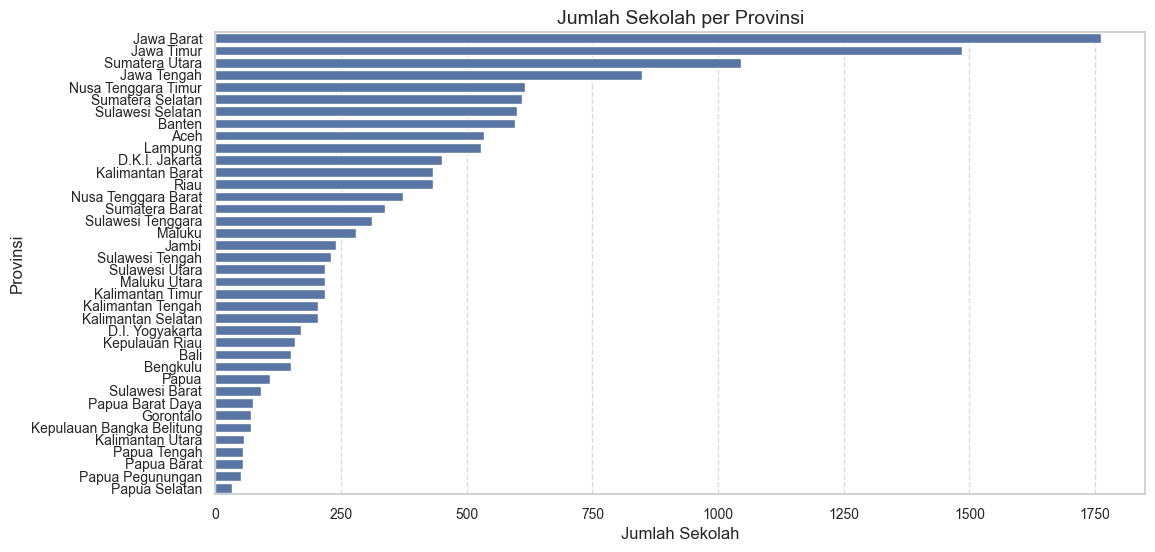

In [74]:
# Plot distribusi jumlah sekolah per provinsi
plt.figure(figsize=(12,6))
sns.barplot(
    x=prov_count.values, 
    y=prov_count.index, 
    color="C0"
)

plt.title('Jumlah Sekolah per Provinsi')
plt.xlabel('Jumlah Sekolah')
plt.ylabel('Provinsi')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Simpan hasil ke file PNG
plt.savefig(f"{diagram_dir}/jumlah_sekolah_per_provinsi.png", dpi=300, bbox_inches="tight")

plt.show()


Hasil analisis distribusi sekolah per provinsi menunjukkan ketimpangan yang cukup jelas:

10 Provinsi Terbanyak Sekolah
- **Jawa Barat (1.762), Jawa Timur (1.486), dan Sumatera Utara (1.045)** mendominasi jumlah sekolah SMA.  
- Provinsi lain seperti **Jawa Tengah, Nusa Tenggara Timur, Sulawesi Selatan, Banten, Aceh, dan Lampung** juga memiliki jumlah sekolah yang relatif tinggi.  
- Hal ini menunjukkan konsentrasi sekolah lebih besar di pulau Jawa dan beberapa provinsi lain dengan kepadatan penduduk tinggi.

10 Provinsi Paling Sedikit Sekolah
- Provinsi di wilayah timur Indonesia seperti **Papua Selatan (34), Papua Pegunungan (51), Papua Barat (54), Papua Tengah (55)** memiliki jumlah sekolah sangat sedikit.  
- Provinsi lain dengan jumlah sekolah rendah termasuk **Kalimantan Utara, Kepulauan Bangka Belitung, Gorontalo, Sulawesi Barat, dan Papua Barat Daya**.  
- Hal ini mencerminkan sebaran geografis yang luas dengan beberapa daerah terpencil atau berpenduduk rendah memiliki jumlah sekolah terbatas.

**Kesimpulan:**  
Distribusi sekolah di Indonesia **`TIDAK MERATA`**, dengan konsentrasi tinggi di Jawa dan sebagian Sumatera, sementara wilayah timur dan daerah terpencil memiliki jumlah sekolah jauh lebih sedikit. Informasi ini penting untuk analisis geografis, perencanaan pendidikan, dan strategi pengumpulan data citra satelit.


### **📚 Akreditasi**

In [76]:
# Hitung jumlah sekolah per akreditasi
akreditasi_count = df_eda['akreditasi'].value_counts()

# Tampilkan distribusi
print("Distribusi Akreditasi Sekolah:")
print(akreditasi_count)


Distribusi Akreditasi Sekolah:
akreditasi
A    6746
B    5193
C    2137
Name: count, dtype: int64


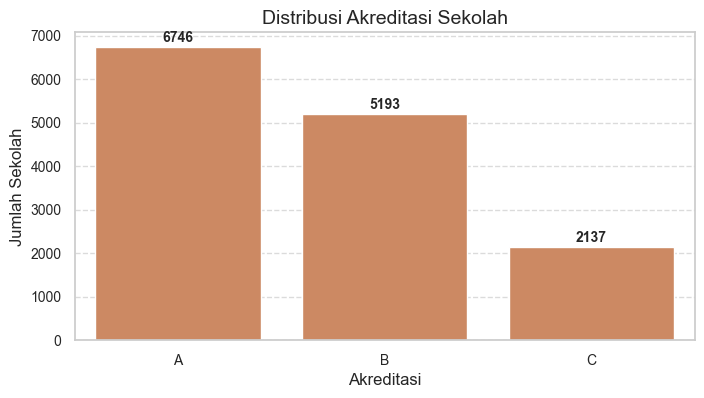

Gambar disimpan di: ../hasil/eda/diagram/distribusi_akreditasi.png


In [78]:
# ================================
# Distribusi jumlah sekolah per akreditasi
# ================================
plt.figure(figsize=(8,4))
ax = sns.barplot(
    x=akreditasi_count.index,
    y=akreditasi_count.values,
    color="C1"  # warna oranye, beda dengan provinsi
)

# Tambahkan label jumlah di atas bar
for i, val in enumerate(akreditasi_count.values):
    ax.text(i, val + 50,   # posisi teks (x=i, y=val+50)
            str(val), 
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# Judul dan label
plt.title('Distribusi Akreditasi Sekolah')
plt.xlabel('Akreditasi')
plt.ylabel('Jumlah Sekolah')

# Grid horizontal
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Simpan gambar
output_path = f"{diagram_dir}/distribusi_akreditasi.png"
plt.savefig(output_path, bbox_inches="tight", dpi=300)

# Tampilkan plot
plt.show()

print(f"Gambar disimpan di: {output_path}")


Hasil analisis distribusi akreditasi menunjukkan:

- **Akreditasi A**: 6.746 sekolah (~48%)  
- **Akreditasi B**: 5.193 sekolah (~37%)  
- **Akreditasi C**: 2.137 sekolah (~15%)  

**Interpretasi:**  
Sebagian besar sekolah SMA di dataset memiliki akreditasi A atau B, sementara sekolah dengan akreditasi C relatif lebih sedikit.  
Hal ini menunjukkan bahwa kualitas sekolah menurut akreditasi di Indonesia cenderung **terkonsentrasi pada level A dan B**.


### **📚 Akreditasi / 🌏 Provinsi**

Untuk memahami distribusi kualitas sekolah lebih detail, kita akan meninjau **jumlah sekolah berdasarkan akreditasi di setiap provinsi**.  
Analisis ini membantu:  

- Mengetahui provinsi mana yang memiliki konsentrasi sekolah dengan akreditasi tinggi (A) atau rendah (C).  
- Mengidentifikasi ketidakseimbangan kualitas sekolah antar provinsi.  
- Memberikan insight untuk pengambilan keputusan terkait pengumpulan data citra satelit atau prioritas intervensi pendidikan.

In [12]:
# Pivot table: jumlah sekolah per akreditasi di setiap provinsi
akreditasi_prov = df_eda.pivot_table(
    index='provinsi',
    columns='akreditasi',
    values='nama_sekolah',
    aggfunc='count',
    fill_value=0
)

# Tambahkan kolom total jumlah sekolah per provinsi
akreditasi_prov['Total'] = akreditasi_prov.sum(axis=1)

# Urutkan berdasarkan total sekolah (dari terbanyak ke tersedikit)
akreditasi_prov = akreditasi_prov.sort_values(by='Total', ascending=False)

# Tampilkan 10 provinsi teratas
print("10 Provinsi Terbanyak Sekolah:")
print(akreditasi_prov.head(10))

# Tampilkan 10 provinsi terbawah
print("\n10 Provinsi Paling Sedikit Sekolah:")
print(akreditasi_prov.tail(10))


10 Provinsi Terbanyak Sekolah:
akreditasi              A    B    C  Total
provinsi                                  
Jawa Barat           1143  541   78   1762
Jawa Timur            736  566  184   1486
Sumatera Utara        542  417   86   1045
Jawa Tengah           574  226   48    848
Nusa Tenggara Timur   169  221  226    616
Sumatera Selatan      227  243  140    610
Sulawesi Selatan      255  247   99    601
Banten                274  234   88    596
Aceh                  167  280   88    535
Lampung               163  230  135    528

10 Provinsi Paling Sedikit Sekolah:
akreditasi                  A   B   C  Total
provinsi                                    
Papua                      40  48  20    108
Sulawesi Barat             14  39  38     91
Papua Barat Daya           15  34  25     74
Gorontalo                  25  31  15     71
Kepulauan Bangka Belitung  48  18   4     70
Kalimantan Utara           27  20  10     57
Papua Tengah               23  17  15     55
Papua Barat

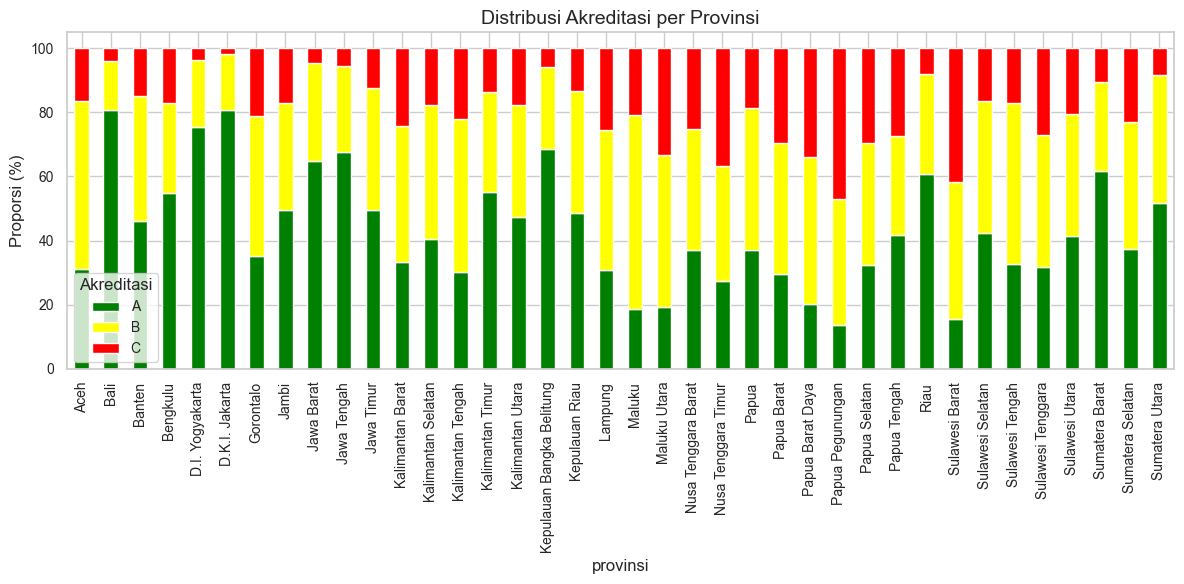

Stacked bar chart disimpan di: ../hasil/eda/diagram/distribusi_akreditasi_per_provinsi_stacked.png


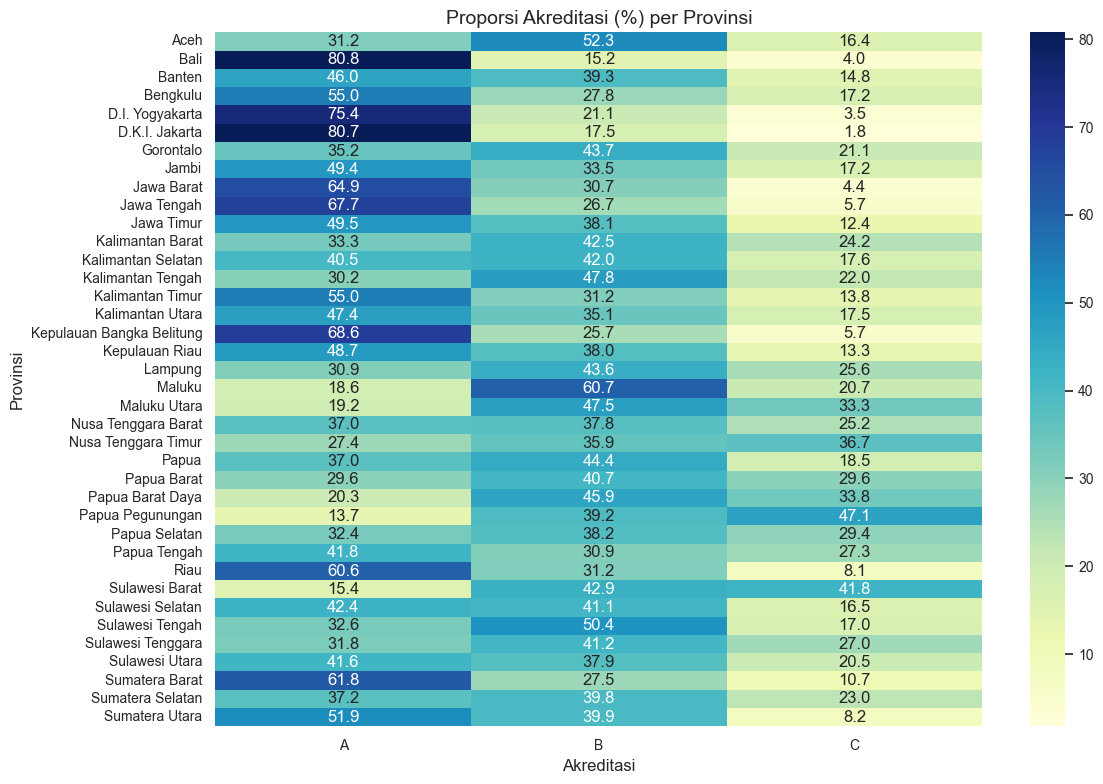

Heatmap disimpan di: ../hasil/eda/diagram/heatmap_akreditasi_per_provinsi.png


In [81]:
# Hitung jumlah sekolah per provinsi & akreditasi
prov_akreditasi = df_eda.groupby(['provinsi', 'akreditasi']).size().reset_index(name='jumlah')

# Hitung proporsi (%)
prov_total = prov_akreditasi.groupby('provinsi')['jumlah'].transform('sum')
prov_akreditasi['proporsi'] = prov_akreditasi['jumlah'] / prov_total * 100

# Pivot data (proporsi per provinsi)
heatmap_data = prov_akreditasi.pivot(index='provinsi', columns='akreditasi', values='proporsi').fillna(0)

# ================================
# Distribusi Akreditasi per Provinsi
# ================================

# === Stacked Bar Chart ===
ax = heatmap_data[["A","B","C"]].plot(
    kind="bar",
    stacked=True,
    color=[color_map[c] for c in ["A","B","C"]],
    figsize=(12,6)
)
plt.ylabel("Proporsi (%)")
plt.title("Distribusi Akreditasi per Provinsi")
plt.legend(title="Akreditasi")
plt.tight_layout()

# Simpan stacked bar chart
output_stacked = f"{diagram_dir}/distribusi_akreditasi_per_provinsi_stacked.png"
plt.savefig(output_stacked, bbox_inches="tight", dpi=300)
plt.show()

print(f"Stacked bar chart disimpan di: {output_stacked}")


# === Heatmap ===
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".1f")
plt.title("Proporsi Akreditasi (%) per Provinsi")
plt.xlabel("Akreditasi")
plt.ylabel("Provinsi")
plt.tight_layout()

# Simpan heatmap
output_heatmap = f"{diagram_dir}/heatmap_akreditasi_per_provinsi.png"
plt.savefig(output_heatmap, bbox_inches="tight", dpi=300)
plt.show()

print(f"Heatmap disimpan di: {output_heatmap}")


In [25]:
# Hitung total sekolah per provinsi
akreditasi_prov['Total'] = akreditasi_prov[['A','B','C']].sum(axis=1)

# Buat kolom persentase
akreditasi_prov['Pct_A'] = akreditasi_prov['A'] / akreditasi_prov['Total'] * 100
akreditasi_prov['Pct_B'] = akreditasi_prov['B'] / akreditasi_prov['Total'] * 100
akreditasi_prov['Pct_C'] = akreditasi_prov['C'] / akreditasi_prov['Total'] * 100

print(akreditasi_prov[['Pct_A','Pct_B','Pct_C']].head(10))


akreditasi           Pct_A  Pct_B  Pct_C
provinsi                                
Jawa Barat           64.87  30.70   4.43
Jawa Timur           49.53  38.09  12.38
Sumatera Utara       51.87  39.90   8.23
Jawa Tengah          67.69  26.65   5.66
Nusa Tenggara Timur  27.44  35.88  36.69
Sumatera Selatan     37.21  39.84  22.95
Sulawesi Selatan     42.43  41.10  16.47
Banten               45.97  39.26  14.77
Aceh                 31.21  52.34  16.45
Lampung              30.87  43.56  25.57


In [26]:
# Urutkan berdasarkan persentase Akreditasi A
akreditasi_A_sorted = akreditasi_prov.sort_values(by='Pct_A', ascending=False)
print("10 Provinsi Teratas Berdasarkan Persentase Akreditasi A:")
print(akreditasi_A_sorted[['Pct_A','Pct_B','Pct_C']].head(10))

# Urutkan berdasarkan persentase Akreditasi B
akreditasi_B_sorted = akreditasi_prov.sort_values(by='Pct_B', ascending=False)
print("\n10 Provinsi Teratas Berdasarkan Persentase Akreditasi B:")
print(akreditasi_B_sorted[['Pct_A','Pct_B','Pct_C']].head(10))

# Urutkan berdasarkan persentase Akreditasi C
akreditasi_C_sorted = akreditasi_prov.sort_values(by='Pct_C', ascending=False)
print("\n10 Provinsi Teratas Berdasarkan Persentase Akreditasi C:")
print(akreditasi_C_sorted[['Pct_A','Pct_B','Pct_C']].head(10))


10 Provinsi Teratas Berdasarkan Persentase Akreditasi A:
akreditasi                 Pct_A  Pct_B  Pct_C
provinsi                                      
Bali                       80.79  15.23   3.97
D.K.I. Jakarta             80.71  17.52   1.77
D.I. Yogyakarta            75.44  21.05   3.51
Kepulauan Bangka Belitung  68.57  25.71   5.71
Jawa Tengah                67.69  26.65   5.66
Jawa Barat                 64.87  30.70   4.43
Sumatera Barat             61.83  27.51  10.65
Riau                       60.65  31.25   8.10
Kalimantan Timur           55.05  31.19  13.76
Bengkulu                   54.97  27.81  17.22

10 Provinsi Teratas Berdasarkan Persentase Akreditasi B:
akreditasi         Pct_A  Pct_B  Pct_C
provinsi                              
Maluku             18.57  60.71  20.71
Aceh               31.21  52.34  16.45
Sulawesi Tengah    32.61  50.43  16.96
Kalimantan Tengah  30.24  47.80  21.95
Maluku Utara       19.18  47.49  33.33
Papua Barat Daya   20.27  45.95  33.78
Papua    

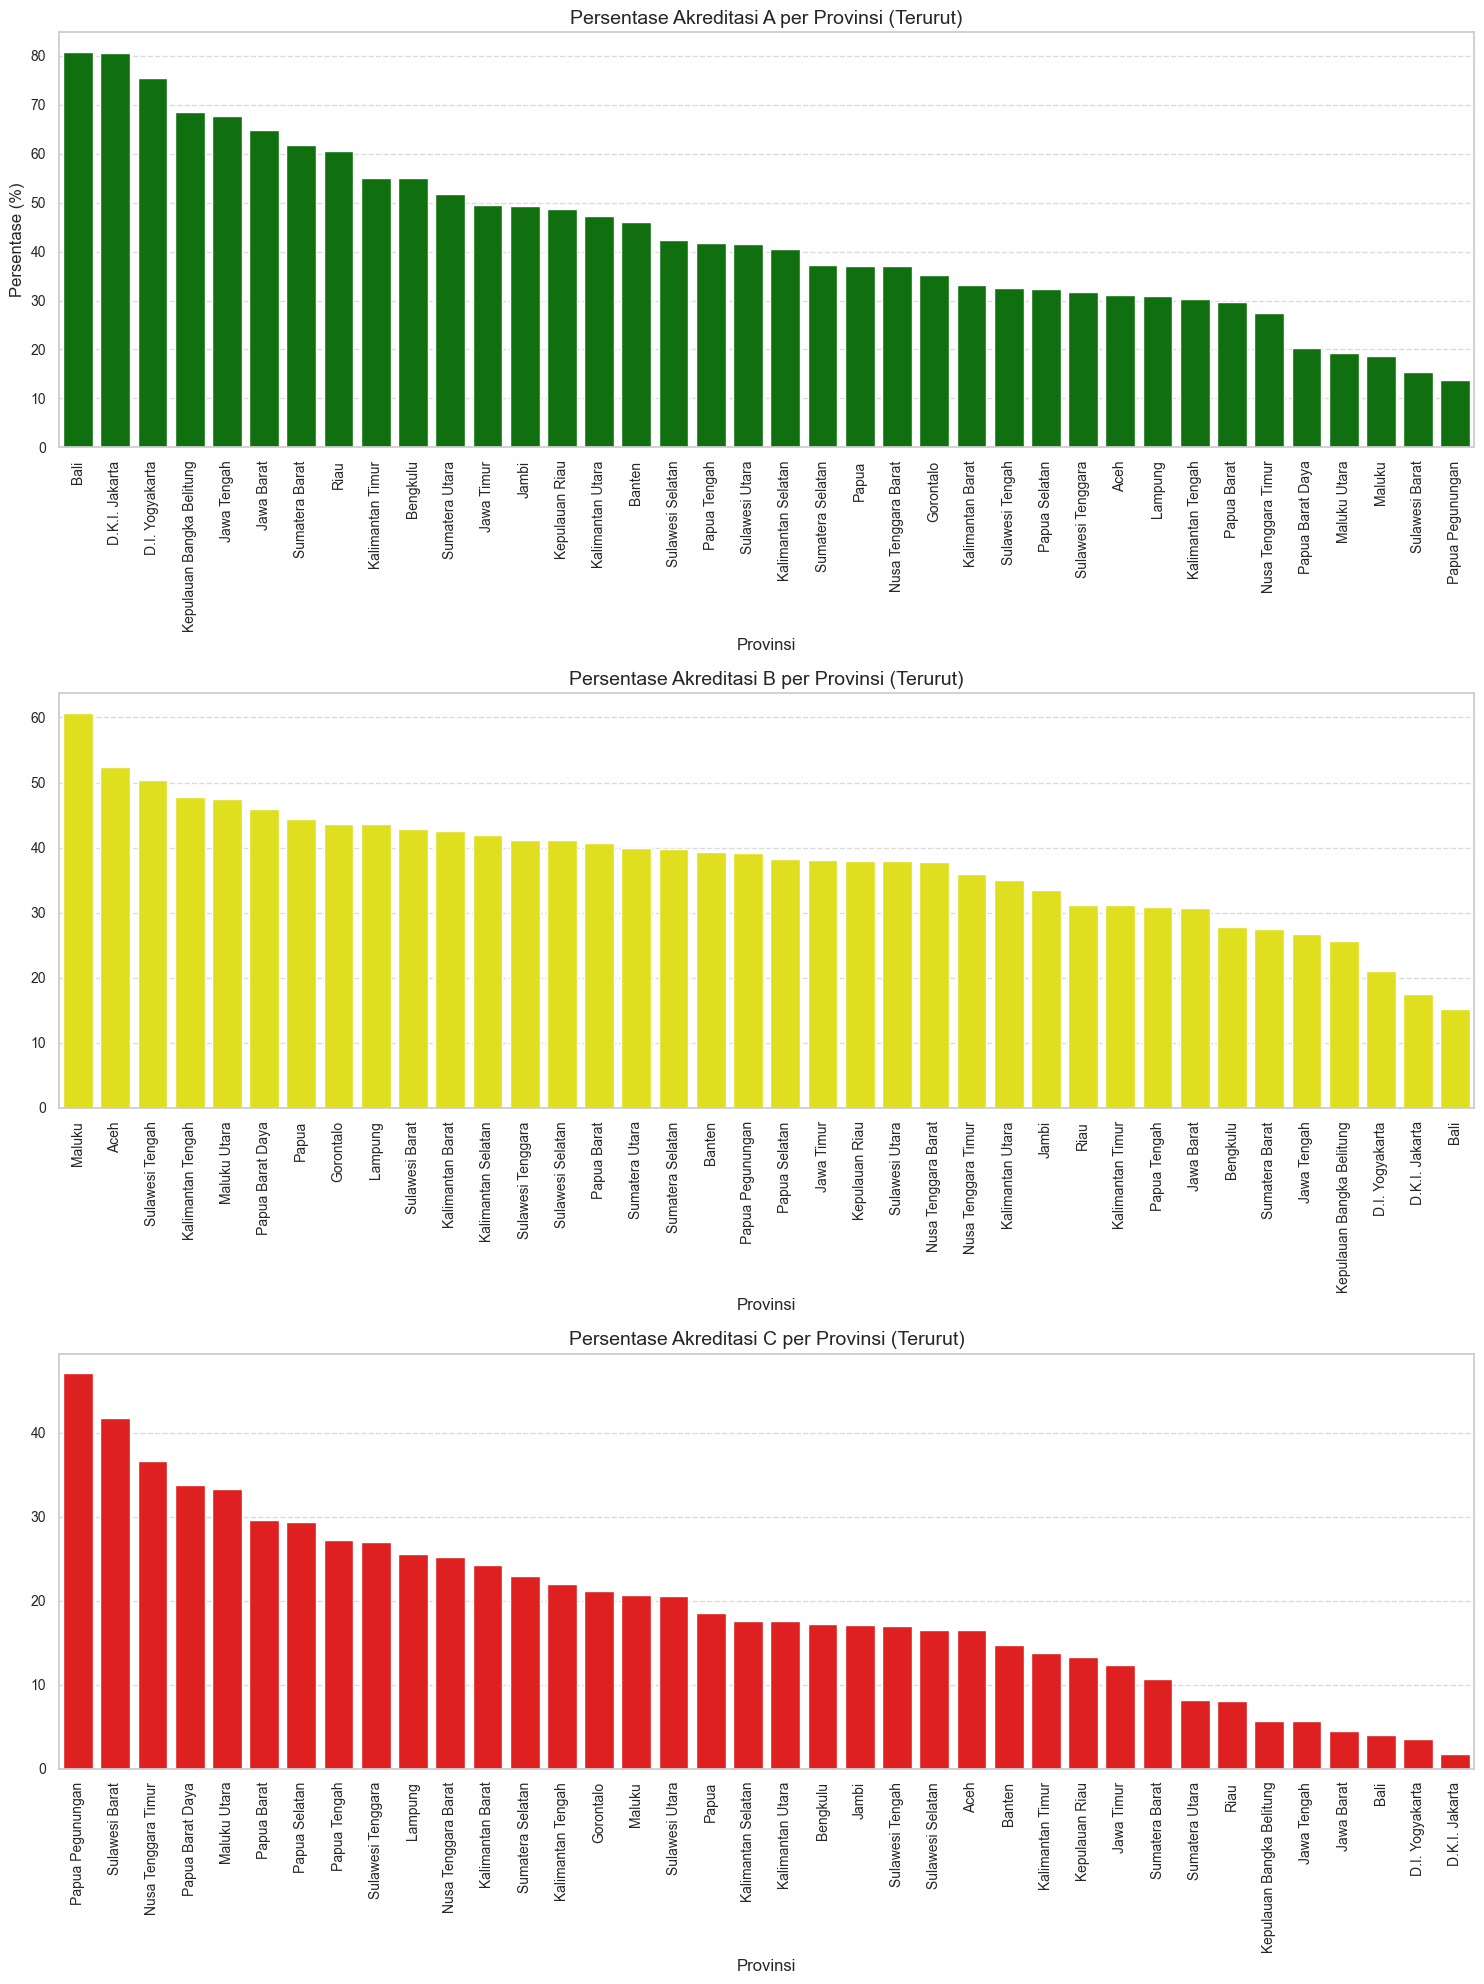

✅ Gambar disimpan di ../hasil/eda/diagram/persentase_akreditasi_per_provinsi.png


In [82]:
# ================================
# Plot Persentase Akreditasi per Provinsi (A, B, C)
# ================================

# Buat figure dengan 3 subplot vertikal
fig, axes = plt.subplots(3, 1, figsize=(15, 20), sharey=False)

# ---------------------------
# Plot Akreditasi A
# ---------------------------
sns.barplot(
    x=akreditasi_A_sorted.index,
    y=akreditasi_A_sorted['Pct_A'],
    ax=axes[0],
    color='green'
)
axes[0].set_title('Persentase Akreditasi A per Provinsi (Terurut)')
axes[0].set_xlabel('Provinsi')
axes[0].set_ylabel('Persentase (%)')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].tick_params(axis='x', rotation=90)

# ---------------------------
# Plot Akreditasi B
# ---------------------------
sns.barplot(
    x=akreditasi_B_sorted.index,
    y=akreditasi_B_sorted['Pct_B'],
    ax=axes[1],
    color='yellow'
)
axes[1].set_title('Persentase Akreditasi B per Provinsi (Terurut)')
axes[1].set_xlabel('Provinsi')
axes[1].set_ylabel('')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].tick_params(axis='x', rotation=90)

# ---------------------------
# Plot Akreditasi C
# ---------------------------
sns.barplot(
    x=akreditasi_C_sorted.index,
    y=akreditasi_C_sorted['Pct_C'],
    ax=axes[2],
    color='red'
)
axes[2].set_title('Persentase Akreditasi C per Provinsi (Terurut)')
axes[2].set_xlabel('Provinsi')
axes[2].set_ylabel('')
axes[2].grid(axis='y', linestyle='--', alpha=0.7)
axes[2].tick_params(axis='x', rotation=90)

plt.tight_layout()

# Simpan gambar
output_path = f"{diagram_dir}/persentase_akreditasi_per_provinsi.png"
plt.savefig(output_path, dpi=300, bbox_inches="tight")
plt.show()

print(f"✅ Gambar disimpan di {output_path}")


Berdasarkan persentase akreditasi A, B, dan C, diperoleh beberapa insight penting:

1. **Provinsi dengan persentase Akreditasi A tertinggi**  
   - Bali, D.K.I. Jakarta, dan D.I. Yogyakarta memiliki >75% sekolah berakreditasi A.  
   - Provinsi Jawa (Jawa Tengah, Jawa Barat) juga relatif tinggi (≈65–68% A).  
   - Menunjukkan bahwa sekolah di provinsi ini **umumnya unggul**.

2. **Provinsi dengan persentase Akreditasi B tertinggi**  
   - Maluku, Aceh, dan Sulawesi Tengah memiliki 50–60% sekolah berakreditasi B.  
   - Menandakan sebagian besar sekolah berada di **level menengah**, dengan persentase A lebih rendah dibanding provinsi Barat.

3. **Provinsi dengan persentase Akreditasi C tertinggi**  
   - Papua Pegunungan, Sulawesi Barat, Nusa Tenggara Timur memiliki >35% sekolah berakreditasi C.  
   - Mengindikasikan **ketimpangan kualitas sekolah** dan kebutuhan intervensi.

4. **Pola umum distribusi akreditasi**  
   - **Wilayah Barat (Jawa, Bali, DKI Jakarta, Yogyakarta)** → dominasi A, kualitas sekolah cenderung tinggi.  
   - **Wilayah Timur (Papua, NTT, Maluku, Sulawesi)** → dominasi B/C, kualitas sekolah lebih bervariasi.  
   - Beberapa provinsi (misal Sulawesi Barat, Papua Barat Daya) muncul di daftar B dan C, menunjukkan distribusi akreditasi yang beragam.

5. **Insight praktis**  
   - Fokus peningkatan kualitas di provinsi dengan akreditasi C tinggi.  
   - Mempertahankan praktik baik di provinsi dengan akreditasi A tinggi.  
   - Mendeteksi ketimpangan antar provinsi agar alokasi sumber daya lebih tepat sasaran.

---
## 3. **Analisis Data Geografis**
---

Tahap ini bertujuan untuk memahami **sebaran geografis sekolah** berdasarkan koordinat longitude (`long`) dan latitude (`lat`).  

- Memvisualisasikan lokasi sekolah di peta atau scatter plot akan membantu mengidentifikasi **cluster geografis**, daerah dengan kepadatan sekolah tinggi, serta provinsi yang memiliki distribusi sekolah lebih jarang.  
- Analisis ini juga bisa digunakan untuk **menggabungkan informasi geografis dengan akreditasi**, misalnya melihat wilayah yang dominan sekolah berkualitas tinggi (A) atau rendah (C).  
- Selain itu, visualisasi geografis mempermudah deteksi **anomali lokasi**, seperti koordinat yang salah atau sekolah yang tercatat berada jauh dari wilayah seharusnya.

### **🗺 Peta Sebaran Sekolah Indonesia**

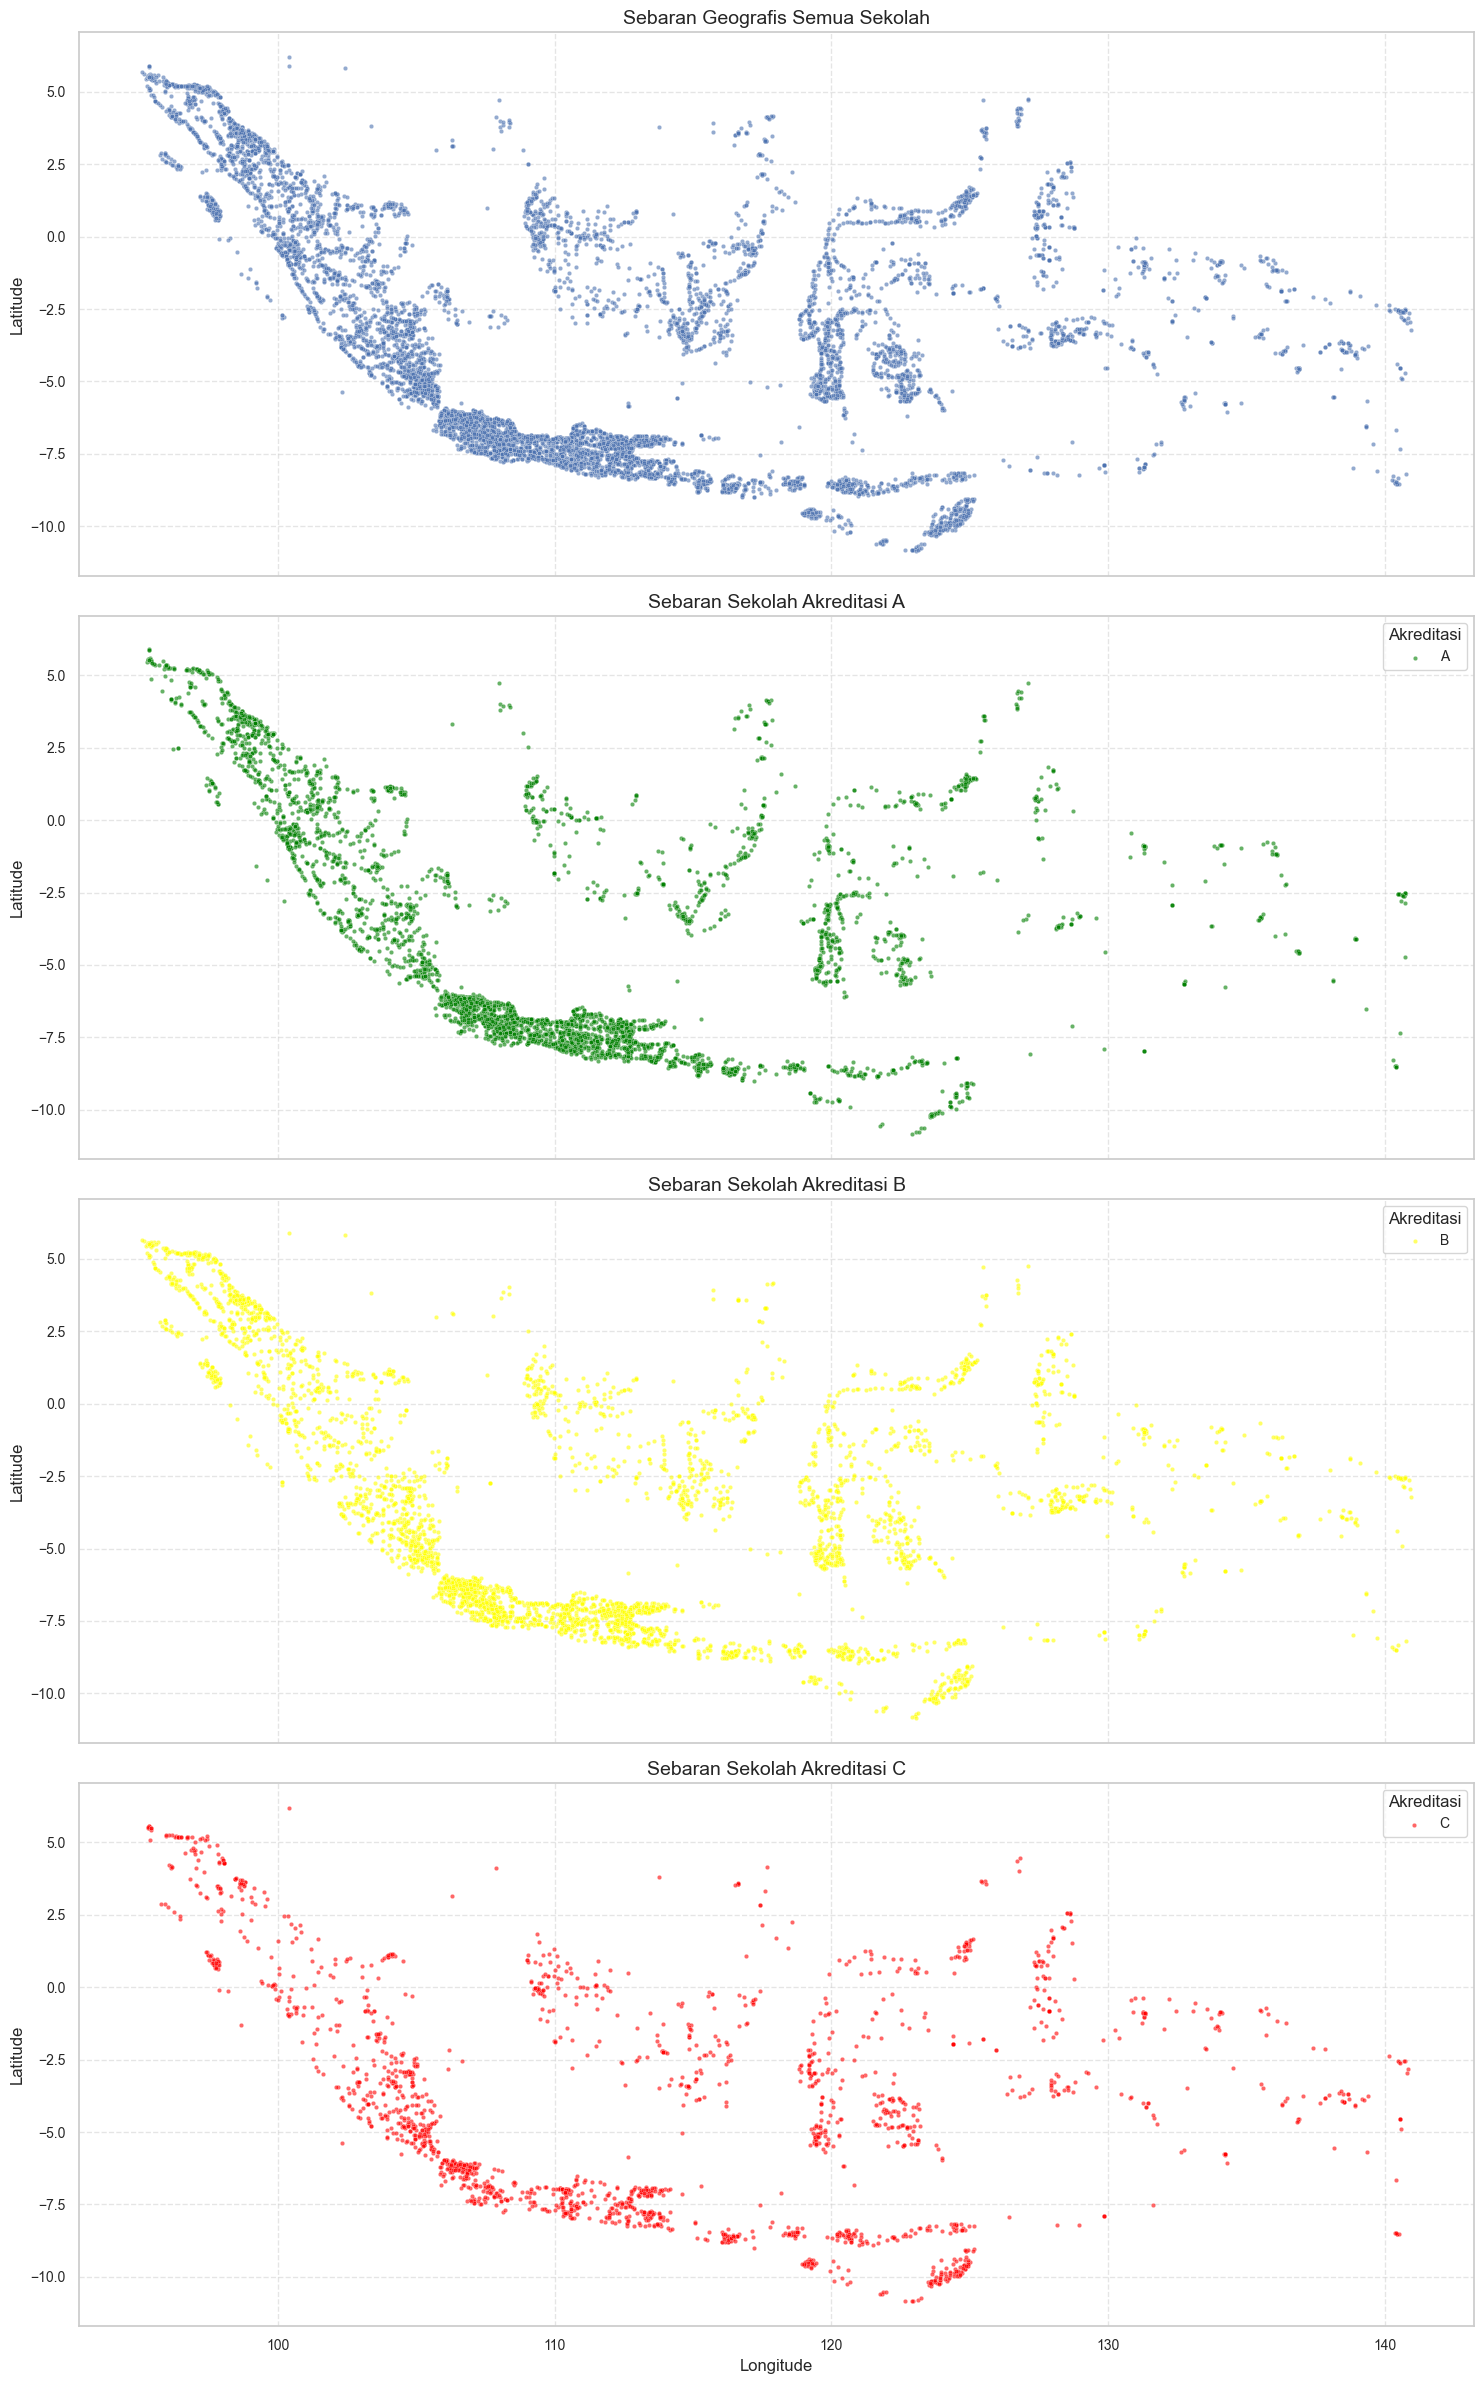

✅ Gambar disimpan di ../hasil/eda/diagram/sebaran_sekolah_per_akreditasi.png


In [83]:
# ===========================
# Scatter Plot Sebaran Sekolah per Akreditasi
# ===========================

# Buat figure dengan 4 subplot vertikal
fig, axes = plt.subplots(4, 1, figsize=(15, 24), sharex=True, sharey=True)

# ===========================
# 1. Semua sekolah
# ===========================
sns.scatterplot(
    x=df_eda['long'],
    y=df_eda['lat'],
    color="C0",
    alpha=0.6,
    s=10,
    ax=axes[0]
)
axes[0].set_title('Sebaran Geografis Semua Sekolah', fontsize=14)
axes[0].set_ylabel('Latitude')

# ===========================
# 2. Akreditasi A
# ===========================
sns.scatterplot(
    x=df_eda[df_eda['akreditasi']=='A']['long'],
    y=df_eda[df_eda['akreditasi']=='A']['lat'],
    color='green',
    alpha=0.6,
    s=10,
    ax=axes[1]
)
axes[1].set_title('Sebaran Sekolah Akreditasi A', fontsize=14)
axes[1].set_ylabel('Latitude')
axes[1].legend(['A'], title='Akreditasi', fontsize=10, title_fontsize=12)

# ===========================
# 3. Akreditasi B
# ===========================
sns.scatterplot(
    x=df_eda[df_eda['akreditasi']=='B']['long'],
    y=df_eda[df_eda['akreditasi']=='B']['lat'],
    color='yellow',
    alpha=0.6,
    s=10,
    ax=axes[2]
)
axes[2].set_title('Sebaran Sekolah Akreditasi B', fontsize=14)
axes[2].set_ylabel('Latitude')
axes[2].legend(['B'], title='Akreditasi', fontsize=10, title_fontsize=12)

# ===========================
# 4. Akreditasi C
# ===========================
sns.scatterplot(
    x=df_eda[df_eda['akreditasi']=='C']['long'],
    y=df_eda[df_eda['akreditasi']=='C']['lat'],
    color='red',
    alpha=0.6,
    s=10,
    ax=axes[3]
)
axes[3].set_title('Sebaran Sekolah Akreditasi C', fontsize=14)
axes[3].set_xlabel('Longitude')
axes[3].set_ylabel('Latitude')
axes[3].legend(['C'], title='Akreditasi', fontsize=10, title_fontsize=12)

# Grid
for ax in axes:
    ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()

# Simpan gambar
output_path = f"{diagram_dir}/sebaran_sekolah_per_akreditasi.png"
plt.savefig(output_path, dpi=300, bbox_inches="tight")
plt.show()

print(f"✅ Gambar disimpan di {output_path}")


### **Analisis Peta per Provinsi**

Pada tahap ini dilakukan analisis spasial berdasarkan **provinsi**.  
Langkah-langkah yang dilakukan adalah:

1. **Pembuatan Peta per Provinsi**  
   - Data sekolah dipisahkan berdasarkan provinsi.  
   - Untuk setiap provinsi dibuat **peta interaktif** menggunakan *library* `folium`.  
   - Peta ini menampilkan titik lokasi sekolah pada provinsi terkait.  
   - Hasil peta disimpan dalam format **HTML** di direktori:  
     ```
     ../hasil/eda/peta-per-provinsi/html/
     ```

2. **Konversi Peta HTML ke PNG**  
   - Karena file HTML tidak bisa langsung divisualisasikan dengan `matplotlib`,  
     maka peta HTML dikonversi menjadi gambar (**PNG**) menggunakan `selenium`.  
   - Hasil konversi disimpan di direktori:  
     ```
     ../hasil/eda/peta-per-provinsi/img/
     ```

3. **Visualisasi Peta**  
   - Beberapa sampel provinsi ditampilkan dalam format grid (misalnya 3x3)  
     agar memudahkan eksplorasi perbandingan antar provinsi.  
   - Visualisasi dilakukan dengan `matplotlib` menggunakan file PNG hasil konversi.  

Dengan cara ini, analisis peta dapat dilakukan secara **interaktif** (HTML) maupun **statis** (PNG) sehingga fleksibel untuk keperluan eksplorasi data dan dokumentasi laporan.


In [70]:
# ==============================
# Warna custom untuk akreditasi
# ==============================
colors = {"A": "green", "B": "yellow", "C": "red"}

# ==============================
# Buat peta folium per provinsi
# ==============================
for prov in df_eda['provinsi'].unique():
    df_prov = df_eda[df_eda['provinsi'] == prov]

    # Buat peta dengan posisi rata-rata
    center_lat = df_prov['lat'].mean()
    center_long = df_prov['long'].mean()
    m = folium.Map(location=[center_lat, center_long], zoom_start=7, tiles="CartoDB positron")

    # Tambahkan titik sekolah
    for _, row in df_prov.iterrows():
        color = colors.get(row['akreditasi'], "gray")
        folium.CircleMarker(
            location=[row['lat'], row['long']],
            radius=5,
            color=color,
            fill=True,
            fill_opacity=0.7,
            popup=f"{row['nama_sekolah']} ({row['akreditasi']})"
        ).add_to(m)

    # Sesuaikan zoom otomatis agar sesuai dengan data provinsi
    m.fit_bounds(df_prov[['lat', 'long']].values.tolist())

    # Simpan HTML
    m.save(f"{html_dir}/{prov}.html")

# ==============================
# Setup Selenium (headless)
# ==============================
chrome_options = Options()
chrome_options.add_argument("--headless=new")
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--no-sandbox")
driver = webdriver.Chrome(options=chrome_options)

def html_to_png(html_path, png_path, delay=2, width=1200, height=800):
    """Konversi HTML ke PNG pakai Selenium"""
    driver.set_window_size(width, height)
    driver.get("file://" + os.path.abspath(html_path))
    time.sleep(delay)  # tunggu peta load
    driver.save_screenshot(png_path)

# ==============================
# Konversi ke PNG
# ==============================
for prov in df_eda['provinsi'].unique():
    html_path = f"{html_dir}/{prov}.html"
    png_path = f"{img_dir}/{prov}.png"
    if os.path.exists(html_path) and not os.path.exists(png_path):
        html_to_png(html_path, png_path)

driver.quit()

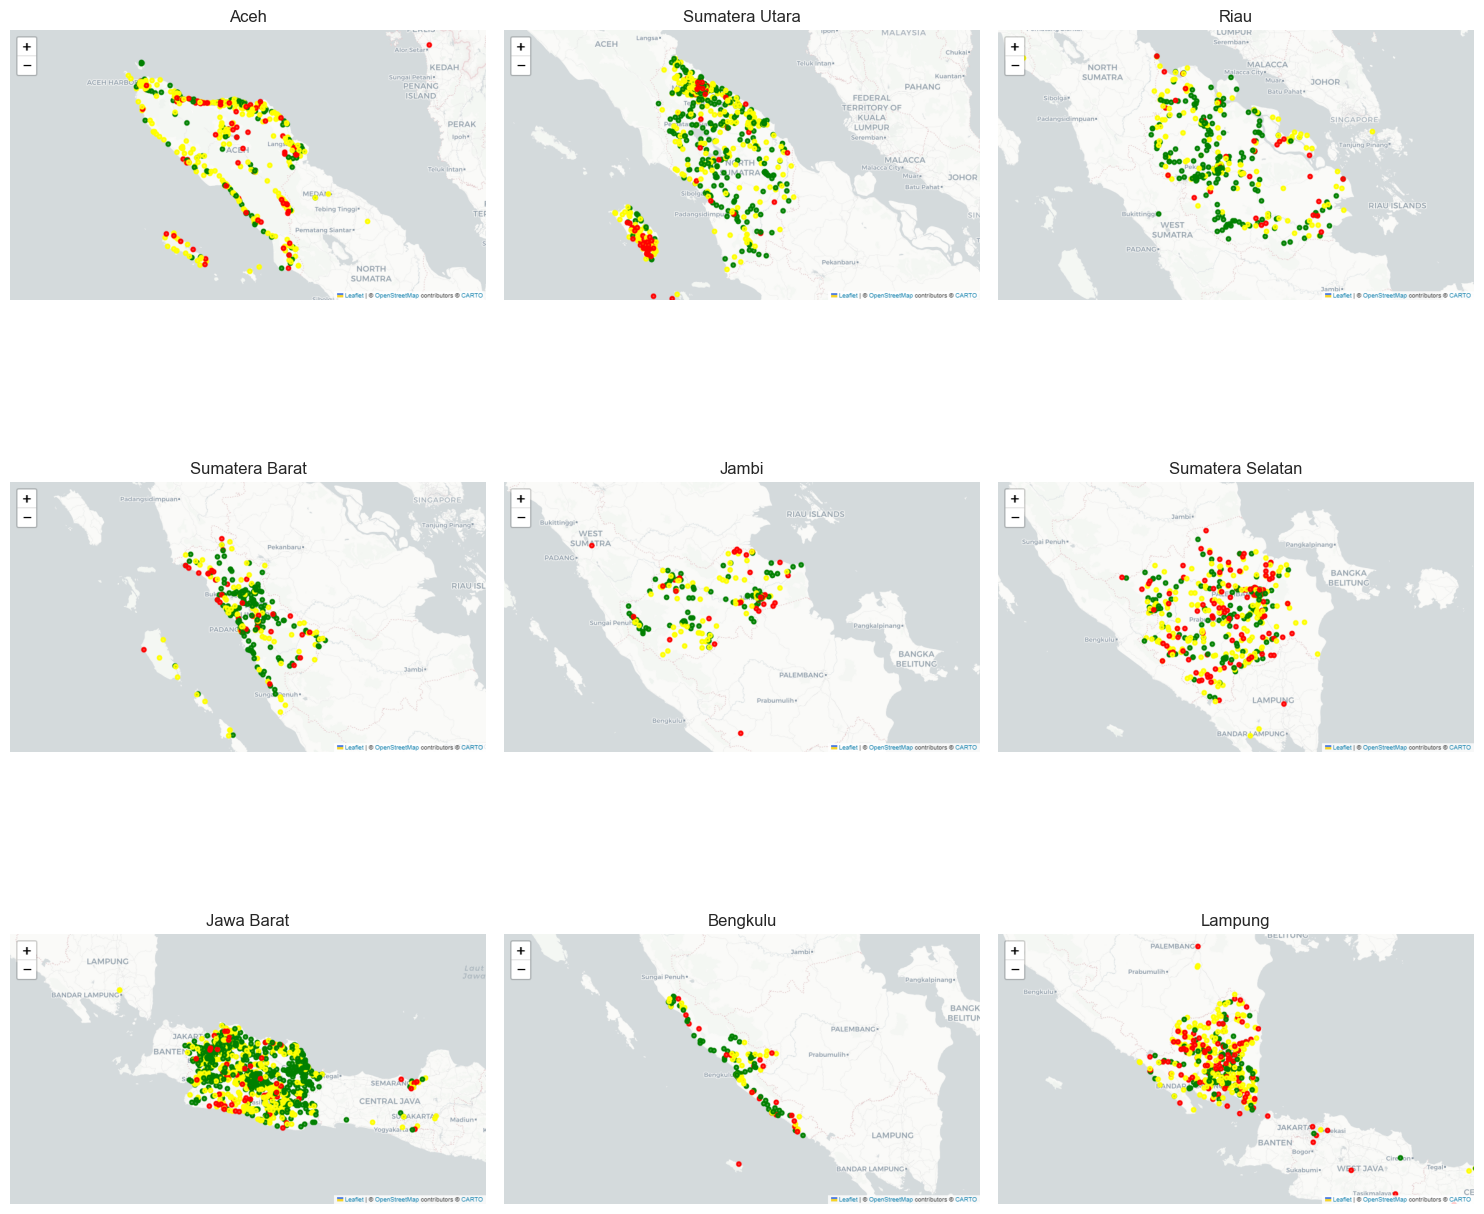

In [72]:
# ==============================
# Plot 3x3 hasil PNG
# ==============================
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

sample_prov = df_eda['provinsi'].unique()[:9]

for ax, prov in zip(axes.flat, sample_prov):
    png_path = f"{img_dir}/{prov}.png"
    if os.path.exists(png_path):
        img = Image.open(png_path)
        ax.imshow(img)
        ax.set_title(prov, fontsize=12)
        ax.axis("off")
    else:
        ax.set_title(f"{prov} (tidak ada gambar)")
        ax.axis("off")

plt.tight_layout()
plt.show()

Berdasarkan hasil visualisasi peta per provinsi, terlihat bahwa:

- Sekolah dengan akreditasi **bagus (A dan B)** cenderung **terkonsentrasi di wilayah pusat kota**.  
- Sedangkan sekolah dengan akreditasi **lebih rendah (C atau belum terakreditasi)** lebih banyak ditemukan di **daerah pinggiran atau perdesaan**.  

Hal ini menunjukkan adanya **kesenjangan kualitas pendidikan** antara daerah perkotaan dan perdesaan,  
yang dapat dikaitkan dengan faktor akses, sumber daya, serta distribusi tenaga pendidik.
